## 다중회귀모델(Multiple Regression Model)
##### - 여러 개의 특성(독립변수 = 항목 = 컬럼 = 변수 = features)을 사용한 선형회귀
##### - 특성이 많을 수록, 복잡도가 높아 집니다.
##### - 1개의 특성은 선형회귀모델이 '직선'을 학습한다면,
##### - 2개이상의 특성으로는 선형회귀모델이 '평면'을 학습하게 됩니다.
##### 
## 다중회귀모델 공식(방정식)
#### y = a * 특성1 + b * 특성2 + c * 특성3 ...... + y절편

## 데이터 준비하기
##### - 구글드라이브 > dataset > 머신러닝 > data > 03_농어....csv

In [344]:
### csv 파일 불러들인 후 데이터 확인해 주세요..
# 변수는 df
import pandas as pd

In [345]:
file_path = './data/03_농어의_길이_높이_두께_데이터.csv'
df = pd.read_csv(file_path)
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


## <사용할 데이터>
##### - 훈련데이터(독립변수) : 길이, 높이, 두께
##### - target데이터(종속변수) : 무게
##### - 새로 추가할 데이터 : (길이 * 높이)
##### - 모든 작업은 사이킷런에서 제공하는 함수 이용
##### 
### 특성공학
##### - 기존의 특성을 이용해서, '새로운 특성(항목)'을 만들어내는 작업

In [346]:
### 데이터프레임을 2차원으로 바꾸기..
# 데이터프레임은 2차원..
# to_numpy()
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [347]:
import numpy as np

In [348]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [349]:
### 1. 훈련데이터와 테스트데이터 분리하기
from sklearn.model_selection import train_test_split

In [350]:
train_input, test_input, train_target, test_target = \
train_test_split(perch_full, perch_weight, random_state=42)

In [351]:
### 사이킷런 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures

In [352]:
### 객체생성(모델)
poly = PolynomialFeatures(include_bias = False)

### 임의값 사용
temp_data = [[2,3]]

### 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(temp_data)

### 찾은 특성 조합으로 데이터 변환하기
poly.transform(temp_data)

### <변환기 특성 조합 생성 규칙>
# - 첫번째 나온 1의 값 : y절편 값 (무조건 처음에 1이 나옵니다.)
# - 두번째~세번째 : 자기 자신의 값을 그대로 넣습니다.
# - 네번째 : 2의 값을 제곱
# - 다섯번째 : 2 * 3
# - 여섯번째 : 3의 제곱

### y절편 1의 값은 PolynomialFeatures 클래스에서 기본적으로
#   특성에 추가된 절편값을 무시해 버립니다.
# - 추가된 y절편 1은 무시해도 되는 값입니다.
# - 보통 PolynomialFeatures 클래스 생성시에 제외시키는 속성을 사용합니다.
# - include_bias = False 옵션 사용하면 y절편값 제외 시킵니다.

array([[2., 3., 4., 6., 9.]])

## 특성 만들기 : 사이킷런의 변환기
##### - 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 객체를 제공
##### - 사이킷런에서 제공하는 이런 클래스들을 '변환기'라고 부릅니다.
## <특성 생성 패키지>
##### - 사용되는 패키지 : sklearn.preprocessing
##### - 사용되는 클래스 : PolynomialFeatures
##### - 사용되는 함수 : fit(), transform(), fit_transforms()
##### - 특성 생성 시 사용하는 데이터는 train_input, test_input 2개
##### - 훈련에 영향을 미치는 특성(항목)을 스스로 찾아서 생성하는 것이 목적이기 때문에
#####    target 데이터는 해당사항이 없습니다.(정답은 변경되면 안됩니다)

In [353]:
### 특성항목 조합패턴 : 기본적인 조합은 2차원을 사용합니다.
# degree = 2

### train_input, test_input 데이터 변환하기...
# 변수명 : train_poly, test_poly 사용
poly = PolynomialFeatures(include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [354]:
train_poly.shape

(42, 9)

In [355]:
test_poly.shape

(14, 9)

In [356]:
### 훈련모델이 사용된 조합의 패턴을 가지고 있습니다.
poly.get_feature_names()
poly.get_feature_names_out()

C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## 다중회귀모델 훈련하기 : 훈련모델 생성

In [357]:
### 훈련데이터와 테스트데이터 결정값 확인까지 해주세요..

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
lr = LinearRegression()

In [360]:
lr.fit(train_poly, train_target)

LinearRegression()

In [361]:
lr.score(train_poly, train_target)

0.9903183436982125

In [362]:
lr.score(test_poly, test_target)

0.9714559911594155

In [401]:
poly = PolynomialFeatures(degree=5, include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [364]:
len(poly.get_feature_names_out())

55

In [365]:
lr.fit(train_poly, train_target)

LinearRegression()

In [366]:
lr.score(train_poly, train_target)

0.9999999999938143

In [367]:
lr.score(test_poly, test_target)

-144.40744532797535

### (해석)
##### - 테스트 평가결과는 매우 큰 음수값 발생
##### - 훈련 평가결과는 매우 아름답습니다.
##### - 이 모델 훈련결과가 좋을 수록 테스트결과가 안좋게 나오는 결과를 보일 수 있습니다.
##### - 과대적합....

## 과적합을 줄이는 방법 : 규제
##### - 규제 : 과대적합이 일어나지 않도록 제어하는 개념...
##### - 계수(기울기 포함)의 값을 줄이는 방법을 규제라고 합니다.
##### - 규제 개념이 적용된 모델 : 릿지(ridge)회귀모델, 라쏘(lasso)회귀모델
##### - 주로 릿지(ridge) 모델을 선호하는 편입니다.
## <규제 순서>
##### 1. 정규화 : 스케일이 다른 항목들을 표준점수로 동일하게 표준화 합니다.
##### --- 표준점수는 사이킷런에서 제공하는 클래스가 있었습니다.
##### 2. 릿지 및 라쏘 모델 적용
## 릿지(ridge)
##### - 계수를 제곱한 값을 기준으로 규제를 적용
##### - 사용패키지 : sklearn.linear_model
##### - 사용클래스(모델) : Ridge
##### - 훈련, 평가, 테스트 : 기존과 동일한 함수 사용
## 라쏘(lasso)
##### - 계수의 절대값을 기준으로 규제를 적용
##### - 사용패키지 : sklearn.linear.model
##### - 사용클래스 : Lasso
##### - 훈련, 평가, 테스트 : 기존과 동일한 함수 사용

In [368]:
### 정규화(또는 표준화)

### 사용패키지
from sklearn.preprocessing import StandardScaler

In [369]:
### 클래스(모델) 생성하기
ss = StandardScaler()

In [370]:
### 스스로 표준점수를 만들어 냅니다.
ss.fit(train_poly, train_target)

StandardScaler()

In [371]:
## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

In [372]:
### 릿지모델과 라쏘모델을 이용해서
### 각각 모델에 대한 훈련/테스트 결정계수 확인...

In [373]:
from sklearn.linear_model import Ridge, Lasso

In [374]:
ridge = Ridge()
ridge

Ridge()

In [375]:
ridge.fit(train_scaled, train_target)

Ridge()

In [376]:
ridge.score(train_scaled, train_target)

0.9896101671037343

In [377]:
ridge.score(test_scaled, test_target)

0.9790693977615386

In [378]:
lasso = Lasso()

In [379]:
lasso.fit(train_scaled, train_target)

Lasso()

In [380]:
lasso.score(train_scaled, train_target)

0.989789897208096

In [381]:
lasso.score(test_scaled, test_target)

0.9800593698421884

## 규제강도 조절하기...
##### - 릿지 및 라쏘 모델의 경우 규제에 대한 강도를 조절하는 속성이 있습니다.
##### - alpha 속성을 사용합니다.
##### - 규제강도 alpha 속성에 들어가는 값을 알려주는 라이브러리는 없습니다.
##### - 사람이 직접 넣어 주어야 합니다.
##### - 보통 모델 함수 속성 중에 사람이 직접 값을 넣어주는 속성들을 '하이퍼 파라미터'라고 합니다.
##### - 파라미터 또는 하이퍼 파라미터...라는 용어를 간혹 쓰시는 분들이 있습니다.

## <alpha 조절값 찾는 방법>
##### - 정해진 방법 없습니다.
##### - 일반적으로 훈련데이터와 학습데이터로 각각 훈련모델을 생성한 후 평가를 통해
##### ... 결정계수 값을 이용해서 그래프를 그린 후에,
##### ... 훈련데이터와 테스트데이터의 결정걔수 값이 가장 가까워지는 지점의
##### ... x축의 값을 이용해서 alpha 값으로 결정합니다.

In [382]:
### alpha 강도 조절값 찾아보기
import matplotlib.pyplot as plt

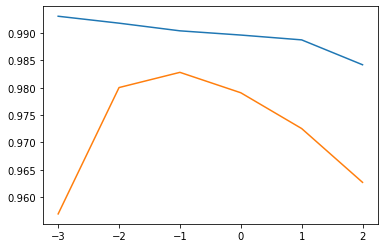

In [383]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list : 
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [384]:
# 릿지 모델
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.1

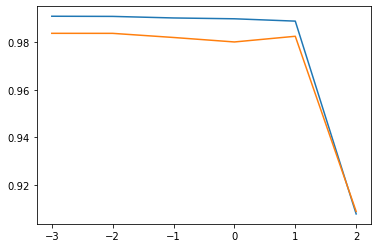

In [385]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list : 
    # 릿지모델
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [386]:
# 라쏘 모델
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [387]:
# # 릿지
# 0.9903815817570368
# 0.9827976465386896
# #라쏘
# 0.9888067471131867
# 0.9824470598706695

## [문제]
##### - 테스트 데이터 : length=50, height=16.49, width=10.6
##### - 위 다중, 릿지, 라쏘,, 모두 예측해 보기..